In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"F:\Arcap REIT\Model_training_ task\Task1\archive (28)\train_df.csv")


In [3]:
data.head(10)

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0
5,41,Male,Heart Disease,1,1,3,Skilled Nursing Facility,0
6,20,Female,Diabetes,1,5,3,Home Health Care,0
7,39,Female,Kidney Disease,1,1,2,Home,0
8,70,Male,COPD,3,4,3,Home Health Care,0
9,19,Male,Kidney Disease,0,13,0,Rehabilitation Facility,0


In [4]:
data.tail(10)

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
4990,27,Female,Diabetes,1,6,4,Rehabilitation Facility,0
4991,89,Male,COPD,0,9,4,Rehabilitation Facility,0
4992,73,Male,Kidney Disease,3,3,4,Home Health Care,0
4993,67,Male,Kidney Disease,5,2,4,Home Health Care,0
4994,29,Male,Kidney Disease,4,5,0,Home,0
4995,77,Female,Heart Disease,3,13,1,Rehabilitation Facility,0
4996,43,Female,Heart Disease,3,9,3,Home Health Care,0
4997,58,Female,Kidney Disease,9,11,3,Home Health Care,0
4998,53,Male,COPD,6,1,0,Rehabilitation Facility,0
4999,40,Male,Diabetes,6,1,0,Home,0


In [5]:
data.shape

(5000, 8)

In [6]:
data.columns

Index(['age', 'gender', 'primary_diagnosis', 'num_procedures',
       'days_in_hospital', 'comorbidity_score', 'discharge_to', 'readmitted'],
      dtype='object')

In [7]:
data.isnull().sum()

age                  0
gender               0
primary_diagnosis    0
num_procedures       0
days_in_hospital     0
comorbidity_score    0
discharge_to         0
readmitted           0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(4)

In [9]:
data.drop_duplicates()

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0
...,...,...,...,...,...,...,...,...
4995,77,Female,Heart Disease,3,13,1,Rehabilitation Facility,0
4996,43,Female,Heart Disease,3,9,3,Home Health Care,0
4997,58,Female,Kidney Disease,9,11,3,Home Health Care,0
4998,53,Male,COPD,6,1,0,Rehabilitation Facility,0


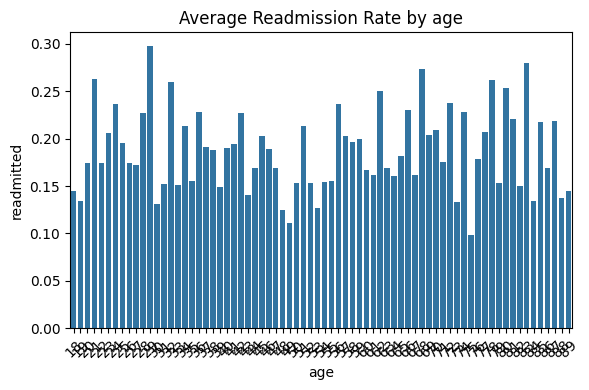

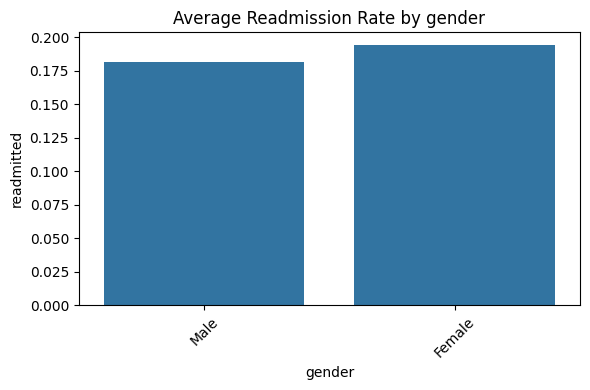

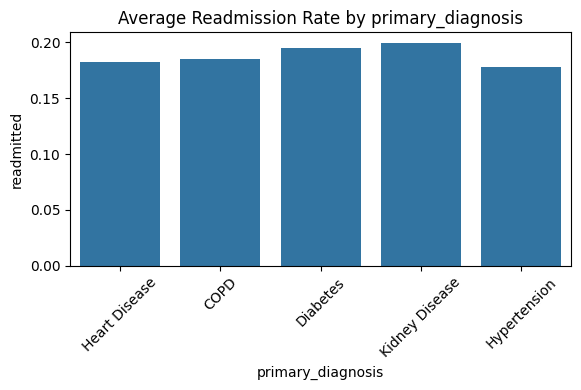

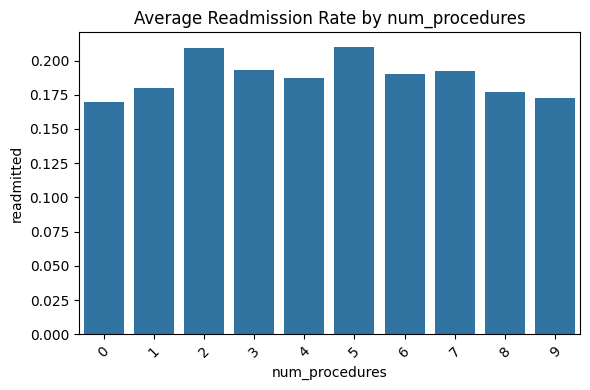

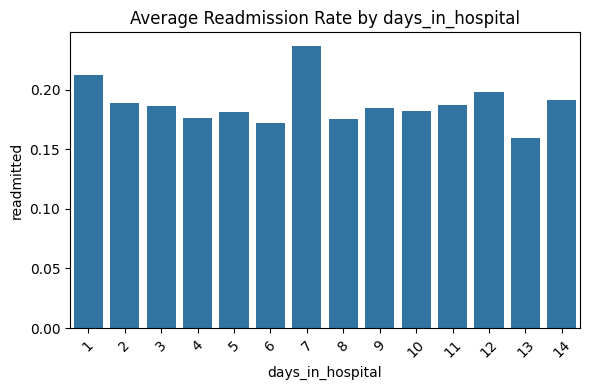

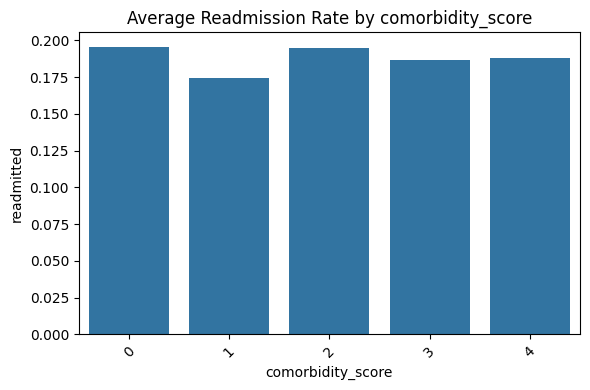

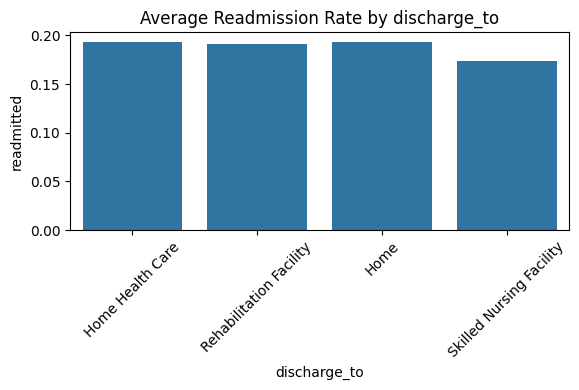

In [10]:
# List of features (excluding target)
features = ['age', 'gender', 'primary_diagnosis', 'num_procedures', 
            'days_in_hospital', 'comorbidity_score', 'discharge_to']



# Create bar plots
for col in features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=col, y='readmitted', data=data, estimator='mean', errorbar=None)
    plt.title(f"Average Readmission Rate by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

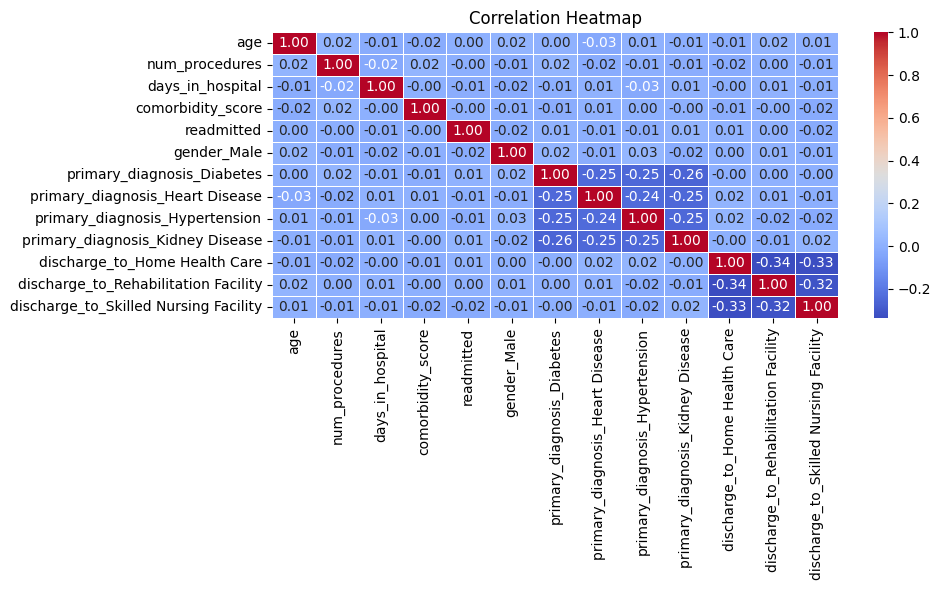

In [11]:
# Convert categorical columns into numerical for correlation
df_encoded = pd.get_dummies(data, drop_first=True)

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [12]:
data.dtypes

age                   int64
gender               object
primary_diagnosis    object
num_procedures        int64
days_in_hospital      int64
comorbidity_score     int64
discharge_to         object
readmitted            int64
dtype: object

In [13]:
X = data.drop('readmitted', axis=1)
y = data['readmitted']

In [14]:
categorical_cols=X.select_dtypes(include='object').columns

In [15]:
categorical_cols

Index(['gender', 'primary_diagnosis', 'discharge_to'], dtype='object')

In [16]:
numerical_cols=X.select_dtypes(exclude='object').columns

In [28]:
numerical_cols

Index(['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score'], dtype='object')

In [17]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['gender', 'primary_diagnosis', 'discharge_to']
numerical_cols = numerical_cols

# Use OneHotEncoder, which supports handle_unknown='ignore'
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', ohe, categorical_cols)
    ]
)

# Fit on training data
X_train = preprocessor.fit_transform(X_train)

# Transform test data safely
X_test = preprocessor.transform(X_test)


In [33]:
# Get numeric and encoded feature names
num_features = numerical_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine into one list
all_features = list(num_features) + list(cat_features)

# Turn into DataFrame with readable columns
input_df = pd.DataFrame(X_train, columns=all_features)
print(input_df.count())


age                                      0
num_procedures                           0
days_in_hospital                         0
comorbidity_score                        0
gender_Male                              0
primary_diagnosis_Diabetes               0
primary_diagnosis_Heart Disease          0
primary_diagnosis_Hypertension           0
primary_diagnosis_Kidney Disease         0
discharge_to_Home Health Care            0
discharge_to_Rehabilitation Facility     0
discharge_to_Skilled Nursing Facility    0
dtype: int64


In [34]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,  # important for newer versions
    eval_metric='logloss'     # avoids warnings
)

model.fit(X_train, y_train)


f:\Arcap REIT\Model_training_ task\venv\lib\site-packages\xgboost\training.py:199: UserWarning: [16:42:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import  mean_squared_error

In [37]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.22666666666666666


In [38]:
import joblib

# Suppose this is your trained model
# model = XGBRegressor(...).fit(X_train, y_train)

# Save the model
joblib.dump(model, "xgb_model.pkl")

print("✅ Model saved successfully as xgb_model.pkl")


✅ Model saved successfully as xgb_model.pkl
